## 4. image & make batch using tf.data

In [1]:
import os
from glob import glob

import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

import warnings
warnings.filterwarnings(action='ignore')

/Users/jeonghyeonjeong/anaconda3/lib/python3.6/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


### 1. tf.data의 사용
> ctrl_csv_path = 'ctrl_dataset.csv'  
> ctrl_data_paths = glob('/Users/jeonghyeonjeong/ds001354-download/dataset/cntrl/*/anat/*'),
> ctrl_images : image = Before_Preprocess(image), ctrl_images.append(image)을 수행 한 것

> pddn_csv_path = 'pddn_dataset.csv'

In [2]:
#1. Before Preprocess function

def Before_Preprocess(data):
    
    brain_image = nib.load(data)
    brain_image = brain_image.get_data()
    brain_image_arr = np.asarray(brain_image)
    
    brain_slice = brain_image_arr[120, :, :]
    
    return brain_slice

In [3]:
#2. After Before Preprocess, merge these images in ctrl_images
ctrl_data_paths = glob('/Users/jeonghyeonjeong/ds001354-download/dataset/cntrl/*/anat/*')

ctrl_images = []

for image in ctrl_data_paths:
    image = Before_Preprocess(image)
    ctrl_images.append(image)
    
np.array(ctrl_images).shape
ctrl_image_tensor = tf.convert_to_tensor(ctrl_images)
ctrl_image_tensor.shape
    

TensorShape([14, 256, 176])

### 2. Batch로 묶기
1. 데이터 경로
2. 이미지를 읽는 것
3. batch로 묶어주기
4. shuffle로 랜덤하게 섞어주기
5. 그리고 시각화 해서 결과보기

In [4]:
#Ctrl_image를 batch로 묶기
dataset = tf.data.Dataset.from_tensor_slices(ctrl_images)
dataset = dataset.batch(batch_size = 32)
dataset = dataset.shuffle(buffer_size = len(ctrl_images))
dataset = dataset.repeat()

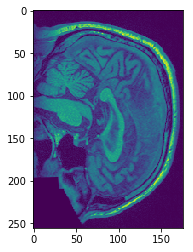

In [5]:
tf_images = next(iter(dataset))
plt.imshow(tf_images[0])
plt.show()

### 3. Label 추출 및 onehot encoding

In [6]:
ctrl_data_paths[-1]

'/Users/jeonghyeonjeong/ds001354-download/dataset/cntrl/sub-cntrl12/anat/sub-cntrl12_T1w.nii'

In [7]:
ctrl_data_paths[-1].split(sep = '/')[-4]

'cntrl'

In [8]:
#위의 과정을 함수화하면
def get_label(path):
    return path.split(sep = '/')[-4]

In [9]:
labels = [get_label(path) for path in ctrl_data_paths]
labels[:5]

['cntrl', 'cntrl', 'cntrl', 'cntrl', 'cntrl']

In [10]:
classes = ['ctrl', 'pddn']

In [11]:
#onehot encoding
def onehot_encoding(label):
    return np.array(classes == label, np.uint8)

### 4. image와 label 함께 넣어주기

In [12]:
def get_image_label(data, label):
    
    brain_image = nib.load(data)
    brain_image = brain_image.get_data()
    brain_image_arr = np.asarray(brain_image)
    
    brain_slice = brain_image_arr[120, :, :]
    
    return brain_slice,label

In [13]:
#2. After Before Preprocess, merge these images in ctrl_images
ctrl_data_paths = glob('/Users/jeonghyeonjeong/ds001354-download/dataset/cntrl/*/anat/*')

ctrl_images = []

for image in ctrl_data_paths:
    image = Before_Preprocess(image)
    ctrl_images.append(image)
    
np.array(ctrl_images).shape
ctrl_image_tensor = tf.convert_to_tensor(ctrl_images)
ctrl_image_tensor.shape
    

TensorShape([14, 256, 176])

In [14]:
#모든 labels를 위의 함수를 사용해서 onehot encoding 해줌
labels = [onehot_encoding(cls_name) for cls_name in labels]

In [15]:
#Ctrl_image를 batch로 묶기
dataset = tf.data.Dataset.from_tensor_slices((ctrl_images, labels))
dataset = dataset.batch(batch_size = 32)
dataset = dataset.shuffle(buffer_size = len(ctrl_images))
dataset = dataset.repeat()

In [16]:
image, labels == next(iter(dataset))

(array([[ 3.99066138,  3.99066138,  8.99855018, ...,  1.99533069,
         10.99388087,  7.00321949],
        [14.00643897,  6.00555414, 15.00410432, ..., 10.99388087,
          5.00788879,  5.00788879],
        [ 1.99533069, 13.00877362,  3.99066138, ...,  5.00788879,
          3.99066138,  0.99766535],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.99766535,
          9.99621552,  6.00555414],
        [ 0.        ,  0.        ,  0.        , ...,  5.00788879,
          6.00555414,  3.99066138],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          3.99066138,  0.99766535]]), False)

In [17]:
np.array(labels[0])

array(0, dtype=uint8)

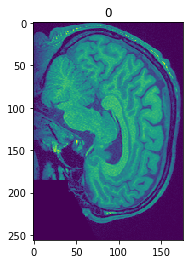

In [18]:
plt.title(np.array(labels[0]))
plt.imshow(image)
plt.show()